In [1]:
import requests
import json
import pandas as pd
import datetime
import math
import seaborn as sns
import tweepy
import tkinter
import time
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.__version__

'0.9.0'

# Pulling Data from Twitter


In [3]:


consumer_key = open("consumer key.txt","r").read()
consumer_secret = open("consumer secret key.txt","r").read()
access_token = open("access token.txt","r").read()
access_token_secret = open("access token secret.txt","r").read()
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:



def searchTerm(query, max_tweets):
    conn = sqlite3.connect('twitterprofiles.db')
    c = conn.cursor()
    
    public_tweets = tweepy.Cursor(api.search, q=query).items(max_tweets)
    
    c.execute('CREATE TABLE IF NOT EXISTS '+query+' (dbtweetid int PRIMARY KEY, dbtweetdate text, dbtweettext text, polarity real)')
    
    for tweet in public_tweets:
        if (tweet.lang == "en") and (not tweet.retweeted) and ('RT @' not in tweet.text):
            tweetid = tweet.id
            tweetdate = tweet.created_at
            tweettext = tweet.text
            polarity = analyzer.polarity_scores(tweettext)['compound']
            c.execute("insert into "+query+" values (?,?,?,?)", (tweetid, tweetdate, tweettext, polarity))
            
    conn.commit()
    c.close()    


In [5]:
def clearTable(tableName):
    conn = sqlite3.connect('twitterprofiles.db')
    c = conn.cursor()
    c.execute(F"DELETE FROM {tableName}")
    conn.commit()
    c.close()
    

In [6]:
def dropTable(tableName):
    conn = sqlite3.connect('twitterprofiles.db')
    c = conn.cursor()
    c.execute(F"DROP TABLE IF EXISTS {tableName}")
    conn.commit()
    c.close()

In [24]:
api.rate_limit_status()['resources']['search']['/search/tweets']['reset']

1541362202

In [31]:
seconds = api.rate_limit_status()['resources']['search']['/search/tweets']['reset']-time.time()

In [41]:
timeleft = str(int(seconds / 60)) + str(int(seconds %60))

In [42]:
timeleft

'052'

In [7]:
c.close()
clearTable('schoolshooting')



NameError: name 'c' is not defined

In [22]:
c.close()

In [33]:
searchTerm('schoolshooting', 1000)

In [9]:
conn = sqlite3.connect('twitterprofiles.db')
c = conn.cursor()
queryDF = pd.read_sql('Select * FROM schoolshooting;', conn)
queryDF
c.close()
    

In [134]:
def visualizeQuery(query, tweets=300):
    rate_limit = api.rate_limit_status()['resources']['search']['/search/tweets']['remaining']
    if(rate_limit>tweets/80):
        dropTable(query)
        print(f"You have {rate_limit} searches left")
        searchTerm(query, tweets)
        after_rate_limit = api.rate_limit_status()['resources']['search']['/search/tweets']['remaining']
        conn = sqlite3.connect('twitterprofiles.db')
        c = conn.cursor()
        queryDF = pd.read_sql(f"Select * FROM {query};", conn)
        queryDF['hour'] = queryDF['dbtweetdate'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)
        queryDF['minute'] = queryDF['dbtweetdate'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').minute)
        querygroup = queryDF.groupby('hour').mean()
        querygroup.plot(y='polarity')
        print(f"Now you have {after_rate_limit} searches left.")
        
        return (querygroup, queryDF)
    else:
        timeleft = str(int(seconds / 60)) + 'm, ' + str(int(seconds %60)) + 's left'
        
        print('Rate limit reached. ' + str(int(seconds %60)))

In [131]:
testdf['minute'] = testdf['dbtweetdate'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').second)

You have 10 searches left
Now you have 168 searches left.


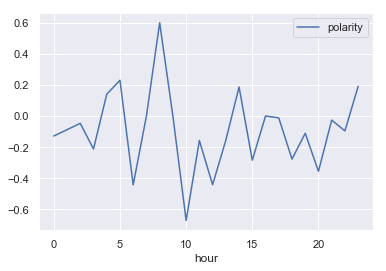

In [133]:
testgroup, testdf = visualizeQuery('schoolshooting',300)

In [135]:
testdf

,dbtweetid,dbtweetdate,dbtweettext,polarity,hour,minute
0,1059077080414064640,2018-11-04 13:37:07,@FoxNews @SecPompeo @FoxNewsSunday #WhatWorrie...,0.0000,13,37
1,1059076816684630017,2018-11-04 13:36:04,#WhatWorriesMe is that people were CAUGHT REDH...,0.0000,13,36
2,1058902133146185728,2018-11-04 02:01:56,*It's time to update security systems to detec...,-0.0258,2,1
3,1058899194692329473,2018-11-04 01:50:16,Condolence to Bobby's family and friends https...,0.4767,1,50
4,1058828722634022912,2018-11-03 21:10:14,Studying abroad in Japan is very cost effectiv...,0.5233,21,10
5,1058813590134640640,2018-11-03 20:10:06,Everyone high school students who hate guns an...,-0.8834,20,10
6,1058798027983544320,2018-11-03 19:08:16,We should research #mentalhealthtreamtment and...,0.0000,19,8
7,1058784817599397888,2018-11-03 18:15:46,"Just some of the reasons why, on #November6th,...",0.0000,18,15
8,1058738357994508290,2018-11-03 15:11:09,So sad. Another school shooting. This one a lo...,-0.5256,15,11
9,1058683578094182400,2018-11-03 11:33:29,@FoxNews Still very afraid of a planned #Schoo...,0.0000,11,33


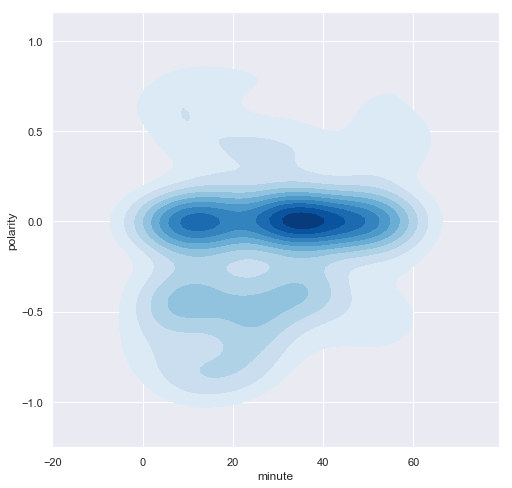

In [142]:
f, ax = plt.subplots(figsize=(8, 8))
sns.set(style="darkgrid")
sns.kdeplot(testdf['minute'],testdf['polarity'], cmap='Blues', shade=True, shade_lowest=False )

In [10]:
queryDF['hour'] = queryDF['dbtweetdate'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)

In [10]:
queryDF

,dbtweetid,dbtweetdate,dbtweettext,polarity
0,1059077080414064640,2018-11-04 13:37:07,@FoxNews @SecPompeo @FoxNewsSunday #WhatWorrie...,0.0000
1,1059076816684630017,2018-11-04 13:36:04,#WhatWorriesMe is that people were CAUGHT REDH...,0.0000
2,1058902133146185728,2018-11-04 02:01:56,*It's time to update security systems to detec...,-0.0258
3,1058899194692329473,2018-11-04 01:50:16,Condolence to Bobby's family and friends https...,0.4767
4,1058828722634022912,2018-11-03 21:10:14,Studying abroad in Japan is very cost effectiv...,0.5233
5,1058813590134640640,2018-11-03 20:10:06,Everyone high school students who hate guns an...,-0.8834
6,1058798027983544320,2018-11-03 19:08:16,We should research #mentalhealthtreamtment and...,0.0000
7,1058784817599397888,2018-11-03 18:15:46,"Just some of the reasons why, on #November6th,...",0.0000
8,1058738357994508290,2018-11-03 15:11:09,So sad. Another school shooting. This one a lo...,-0.5256
9,1058683578094182400,2018-11-03 11:33:29,@FoxNews Still very afraid of a planned #Schoo...,0.0000


In [12]:
querygroup = queryDF.groupby('hour').mean()

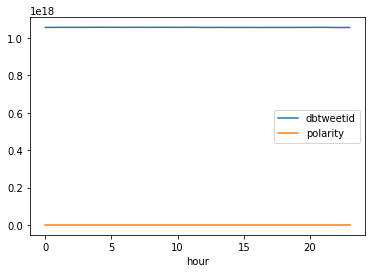

In [13]:
querygroup.plot()

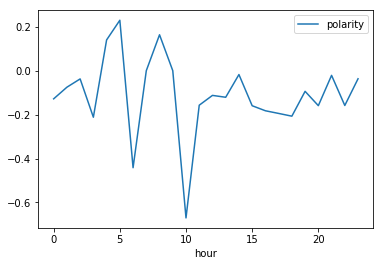

In [14]:
querygroup.plot(y='polarity')

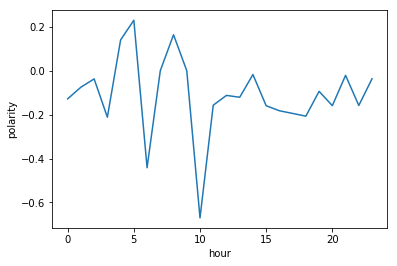

In [17]:
sns.lineplot(x=querygroup.index, y=querygroup['polarity'])

In [21]:
def visualizeLocTrends(location):
    Trends =api.trends_place(location)
    Trendsdf = pd.DataFrame(Trends[0]['trends']).sort_values('tweet_volume', ascending=False).head(10)
    # Incomplete

In [22]:
def topicSentVisualization(topic):
    results =  api.search(topic,rpp=100, lang='en', show_user=True)
    df = pd.DataFrame(results)
    # Incomplete

# Sentiment Analysis

In [2]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()